# Decision Trees
- Decision Trees are the easiest and most popularly used supervised machine learning algorithm for making a prediction.

- The decision trees algorithm is used for regression as well as for classification problems. It is very easy to read and understand.

- Decision Trees are flowchart-like tree structures of all the possible solutions to a decision, based on certain conditions. It is called a decision tree as it starts from a root and then branches off to a number of decisions just like a tree.

## Attribute Selection Measure
- he best attribute or feature is selected using the Attribute Selection Measure(ASM). The attribute selected is the root node feature.
- Attribute selection measure is a technique used for the selecting best attribute for discrimination among tuples. It gives rank to each attribute and the best attribute is selected as splitting criterion.
- The most popular methods of selection are:
    - Entropy
    - Information Gain
    - Gain Ratio
    - Gini Index

### Entropy
- To understand information gain, we must first be familiar with the concept of entropy. **Entropy is the randomness in the information being processed.**

- It measures the purity of the split. It is hard to draw conclusions from the information when the entropy increases. It **ranges between 0 to 1**. 1 means that it is a completely impure subset.

In [2]:
# If there are total 100 instances in our class 
# in which 30 are positive and 70 are negative then,

# P(+) = 3/10 and P(-) = 7/10
# H(s)= -3/10 * log2 (3/10) - 7/10 * log2 ( 7/10)  ≈ 0.88

### Information Gain
- Information gain is a decrease in entropy. Decision trees make use of information gain and entropy to determine which feature to split into nodes to get closer to predicting the target and also to determine when to stop splitting.


- S is a set of instances , A is an attribute and Sv is the subset of S 

In [3]:
import pandas as pd
df = pd.DataFrame(
    {
        'Monthly_Income_>$1000':[True,True,False,\
                                True,False,False,\
                                True,False,True,True],
        'TV_at_home': ['Yes','Yes','No',\
                       'No','Yes','No',\
                       'Yes','No','No','Yes',
                      ],
        'Internet_at_home': ['Yes','Yes','Yes',\
                       'No','Yes','Yes',\
                       'No','Yes','No','Yes',]
    },
    columns=['Monthly_Income_>$1000','TV_at_home','Internet_at_home']
)
df

,Monthly_Income_>$1000,TV_at_home,Internet_at_home
0,True,Yes,Yes
1,True,Yes,Yes
2,False,No,Yes
3,True,No,No
4,False,Yes,Yes
5,False,No,Yes
6,True,Yes,No
7,False,No,Yes
8,True,No,No
9,True,Yes,Yes


In [4]:
# -- rue values
# H(s) = -[ ( 5/10)  * log2 (5/10) +  (5/10) * log2 (5/10) ] = 1
# H(s) = -[ ( 4/6) * log2 ( 4/6) + (2/6) * log2 (2/6) ] = 0.917

# false values
# H(s)= - [ ( 3/4) * log2 (3/4) + (1/4) * log2 (1/4) ] = 0.811
# 

#  Net Entropy = (6/10) * 0.917 + (4/10) * 0.811 = 0.874
#  Total Reduction = 1- 0.874 = 0.126  
# This value ( 0.126) is called information gain.

### Gain Ratio
- The gain ratio is the modification of information gain. It takes into account the number and size of branches when choosing an attribute. It takes intrinsic information into account.
- GR(S,A) = Gain( S,A)/ IntI(S,A)

### Gini Index
- Gini index is also type of criterion that helps us to calculate information gain. It measures the impurity of the node and is calculated for binary values only.
- C1 = 0 , C2 = 6
    - P(C1) = 0/6 = 0
    - P(C2) = 6/6 = 1
    


# Sklearn Decision Tree Classification

In [9]:
import pandas as pd 
import numpy as np
from sklearn.datasets import load_wine
from sklearn import tree

In [11]:
wine = load_wine() 

In [12]:
print(wine.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [13]:
print(wine.target_names) 

['class_0' 'class_1' 'class_2']


### Remove the Labels
Now, we will remove the elements in the 0th, 50th, and 100th position. 

In [14]:
#Spilitting the dataset
removed =[0,50,100]
new_target = np.delete(wine.target,removed)
new_data = np.delete(wine.data,removed, axis=0) 

### Train the Decision Tree Classifier
The final step is to use a decision tree classifier from scikit-learn for classification.

In [15]:
# train classifier

# defining decision tree classifier
clf = tree.DecisionTreeClassifier() 

# train data on new data and new target
clf=clf.fit(new_data,new_target) 

#  assign removed data as input
prediction = clf.predict(wine.data[removed]) 

In [16]:
print("Original Labels",wine.target[removed])
print("Labels Predicted",prediction)

Original Labels [0 0 1]
Labels Predicted [0 0 1]


[Text(189.42631578947368, 199.32, 'X[12] <= 755.0\ngini = 0.659\nsamples = 175\nvalue = [57, 70, 48]'),
 Text(114.53684210526316, 163.07999999999998, 'X[11] <= 2.115\ngini = 0.494\nsamples = 110\nvalue = [2, 66, 42]'),
 Text(70.48421052631579, 126.83999999999999, 'X[10] <= 0.935\ngini = 0.227\nsamples = 46\nvalue = [0, 6, 40]'),
 Text(35.242105263157896, 90.6, 'X[6] <= 1.58\ngini = 0.049\nsamples = 40\nvalue = [0, 1, 39]'),
 Text(17.621052631578948, 54.359999999999985, 'gini = 0.0\nsamples = 39\nvalue = [0, 0, 39]'),
 Text(52.863157894736844, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(105.72631578947369, 90.6, 'X[1] <= 2.395\ngini = 0.278\nsamples = 6\nvalue = [0, 5, 1]'),
 Text(88.10526315789474, 54.359999999999985, 'gini = 0.0\nsamples = 5\nvalue = [0, 5, 0]'),
 Text(123.34736842105264, 54.359999999999985, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(158.58947368421053, 126.83999999999999, 'X[6] <= 0.795\ngini = 0.119\nsamples = 64\nvalue = [2, 6

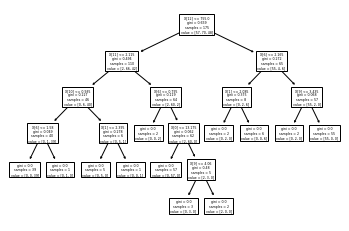

In [23]:
tree.plot_tree(clf) 